<a href="https://colab.research.google.com/github/MarioBolanos/AnalisisNumerico/blob/master/Others/ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary diferential equations
###Importing Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
#For nicely displayed output from SymPy, we need to initialize its printing system:
sympy.init_printing()

##Ordinary diferential equations

$$\frac { dy(x) }{ dx } =f(x,y(x))$$

### Symbolic Solution to ODES

#### Newton's law of cooling

$$ \frac{dT(t)}{dt}=-K(T(t)-T_a)$$

In [ ]:
t, k, T0, Ta = sympy.symbols('t, k,T0,Ta')
T = sympy.Function("T")

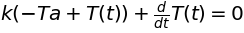

In [ ]:
ode = T(t).diff(t) + k*(T(t)-Ta)
sympy.Eq(ode)

In [ ]:
ode_sol = sympy.dsolve(ode)
ode_sol

In [ ]:
ode_sol.lhs

In [ ]:
ode_sol.rhs

In [ ]:
ics = {T(0): T0}
ics

In [ ]:
C_eq = ode_sol.subs(t, 0).subs(ics)
C_eq

In [ ]:
C_sol = sympy.solve(C_eq)
C_sol

In [ ]:
ode_sol.subs(C_sol[0])

In [ ]:
def apply_ics(sol, ics, x, known_params):

  """
   Apply the initial conditions (ics), given as a dictionary on
   the form ics = {y(0): y0, y(x).diff(x).subs(x, 0): yp0, ...},
   to the solution of the ODE with independent variable x.
   The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
   the known_params list.
   """

  free_params = sol.free_symbols - set(known_params)
  eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n))
  .subs(x, 0).subs(ics) for n in range(len(ics))]
  sol_params = sympy.solve(eqs, free_params)
  return sol.subs(sol_params)

In [ ]:
ode_sol

In [ ]:
apply_ics(ode_sol, ics, t, [k, Ta])

####Example 2: Damped harmonic Oscillator

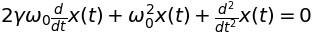

In [ ]:
t, omega0, gamma= sympy.symbols("t, omega_0, gamma",positive=True)
x = sympy.Function("x")
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)
sympy.Eq(ode)

In [ ]:
ode_sol = sympy.dsolve(ode)
ode_sol

Initial conditions for position $x(0)=1$ and velocity $\frac{dx(t)}{dt}=0$

In [ ]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 1, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

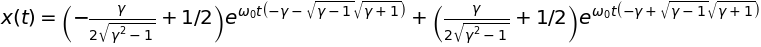

In [ ]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

In [ ]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

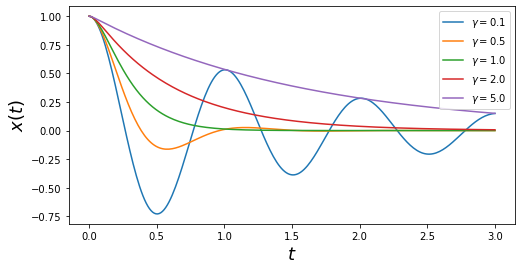

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
  if g == 1:
    x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
  else:
    x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0,gamma: g}), 'numpy')
  ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
  ax.set_xlabel(r"$t$", fontsize=18)
  ax.set_ylabel(r"$x(t)$", fontsize=18)
  ax.legend()

####Example 3: $$ \frac{dy(x)}{dx}=x+y(x)^2 $$

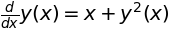

In [ ]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

In [ ]:
sympy.dsolve(y(x).diff(x) - f)

####Example 4  $$ \frac{d^2y(x)}{dx}=x+y(x)^2 $$

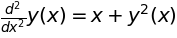

In [ ]:
sympy.Eq(y(x).diff(x, x), f)

In [ ]:
sympy.dsolve(y(x).diff(x, x) - f)


NotImplementedError: ignored

### Direction fields

In [ ]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5),
  y_lim=(-5, 5), ax=None):
  f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
  x_vec = np.linspace(x_lim[0], x_lim[1], 20)
  y_vec = np.linspace(y_lim[0], y_lim[1], 20)

  if ax is None:
    _, ax = plt.subplots(figsize=(4, 4))

  dx = x_vec[1] - x_vec[0]
  dy = y_vec[1] - y_vec[0]

  for m, xx in enumerate(x_vec):
    for n, yy in enumerate(y_vec):
      Dy = f_np(xx, yy) * dx
      Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
      Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
      ax.plot([xx - Dx/2, xx + Dx/2],
              [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
  ax.axis('tight')
  ax.set_title(r"$%s$" %
  (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
  fontsize=18)
  return ax



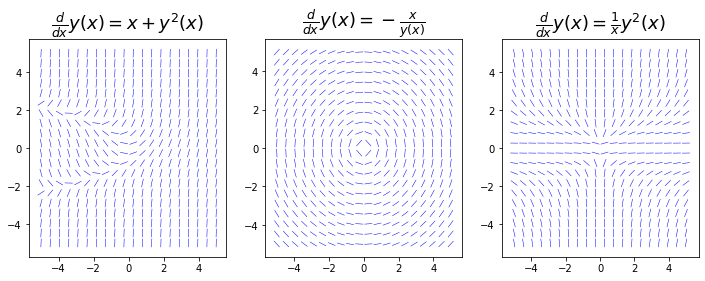

In [ ]:
x = sympy.symbols("x")
y = sympy.Function("y")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])

Consider again the ODE $$ \frac{dy(x)}{dx}=x+y(x)^2$$ with $y(0)=0$

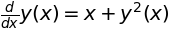

In [ ]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

In [ ]:
ics = {y(0): 0}
ode_sol = sympy.dsolve(y(x).diff(x) - f, ics=ics)
ode_sol

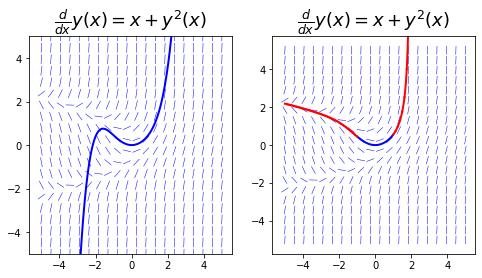

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# left panel
plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())
(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)

# right panel
plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())
(x_vec), 'b', lw=2)
# iteratively resolve the ODE with updated initial conditions
ode_sol_m = ode_sol_p = ode_sol
dx = 0.125
# positive x

for x0 in np.arange(1, 2., dx):
  x_vec = np.linspace(x0, x0 + dx, 100)
  ics = {y(x0): ode_sol_p.rhs.removeO().subs(x, x0)}
  ode_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
  axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())
  (x_vec), 'r', lw=2)
# negative x
for x0 in np.arange(-1, -5, -dx):
  x_vec = np.linspace(x0, x0 - dx, 100)
  ics = {y(x0): ode_sol_m.rhs.removeO().subs(x, x0)}
  ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
  axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())
  (x_vec), 'r', lw=2)

## Numerical Methods for Solving ODES

### Numerical Integration of ODEs using Scipy

In [ ]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

f_np = sympy.lambdify((y(x), x), f)

y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)

# xm = np.linspace(0, -5, 100)
# ym = integrate.odeint(f_np, y0, xm)

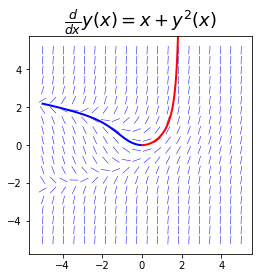

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

####Example 1: Lotka Volterra (Prey-Predator)

In [ ]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
  x, y = xy
  return [a * x - b * x * y, c * x * y - d * y]

In [ ]:
xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

Text(0, 0.5, 'Number of predators')

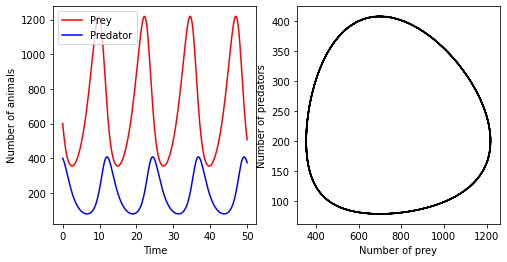

In [ ]:
 fig, axes = plt.subplots(1, 2, figsize=(8, 4))
 axes[0].plot(t, xy_t[:,0], 'r', label="Prey")
 axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
 axes[0].set_xlabel("Time")
 axes[0].set_ylabel("Number of animals")
 axes[0].legend()
 axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
 axes[1].set_xlabel("Number of prey")
 axes[1].set_ylabel("Number of predators")

####Example 2: Lorenz Equation

In [ ]:
def f(xyz, t, sigma, rho, beta):
  x, y, z = xyz
  return [sigma * (y - x), x * (rho - z) - y,x * y - beta * z]


In [ ]:
sigma, rho, beta = 8, 28, 8/3.0
t = np.linspace(0, 25, 10000)
xyz0 = [1.0, 1.0, 1.0]

In [ ]:
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

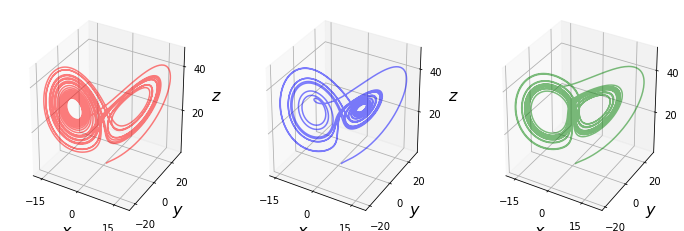

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), subplot_kw={'projection':'3d'})
for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'),(ax3, xyz3, 'g')]:
  ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
  ax.set_xlabel('$x$', fontsize=16)
  ax.set_ylabel('$y$', fontsize=16)
  ax.set_zlabel('$z$', fontsize=16)
  ax.set_xticks([-15, 0, 15])
  ax.set_yticks([-20, 0, 20])
  ax.set_zticks([0, 20, 40])

#### Example 3: Two coupled springs

In [ ]:
def f(t, y, args):
  m1, k1, g1, m2, k2, g2 = args
  return [y[1], - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) - g1/m1 * y[1], y[3],
          - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3]]


In [ ]:
m1, k1, g1 = 1.0, 10.0, 0.5
m2, k2, g2 = 2.0, 40.0, 0.25
args = (m1, k1, g1, m2, k2, g2)
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)

In [ ]:
r = integrate.ode(f)
r.set_integrator('lsoda');
r.set_initial_value(y0, t[0]);
r.set_f_params(args);

In [ ]:
 dt = t[1] - t[0]
 y = np.zeros((len(t), len(y0)))
 idx = 0
 while r.successful() and r.t < t[-1]:
   y[idx, :] = r.y
   r.integrate(r.t + dt)
   idx += 1

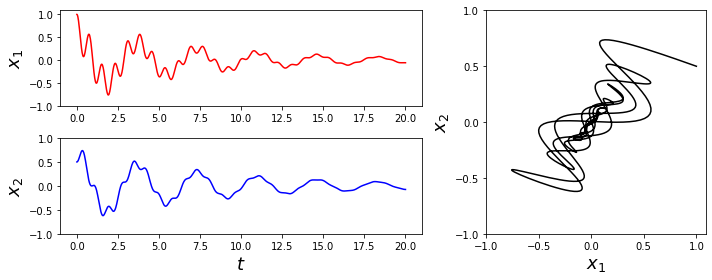

In [ ]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
# x_1 vs time plot
ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])
# x2 vs time plot
ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])
# x1 and x2 phase space plot
ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])
fig.tight_layout()

In [ ]:
 def jac(t, y, args):
   m1, k1, g1, m2, k2, g2 = args
   return [[0, 1, 0, 0], [- k1/m2 - k2/m1, - g1/m1 * y[1], k2/m1, 0], 
           [0, 0, 1, 0], [k2/m2, 0, - k2/m2, - g2/m2]]
           
r = integrate.ode(f, jac)
r.set_jac_params(args);

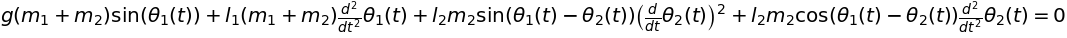

In [ ]:
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)
ode1 = sympy.Eq((m1+m2)*l1 * theta1(t).diff(t,t) + m2*l2 * theta2(t).diff(t,t) *
                sympy.cos(theta1(t)-theta2(t)) + m2*l2 * theta2(t).diff(t)**2 * 
                sympy.sin(theta1(t)-theta2(t)) + g*(m1+m2) * sympy.sin(theta1(t)))
ode1

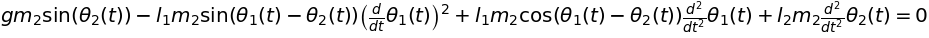

In [ ]:
ode2 = sympy.Eq(m2*l2 * theta2(t).diff(t,t) +
                m2*l1 * theta1(t).diff(t,t) * sympy.
                cos(theta1(t)-theta2(t)) -
                m2*l1 * theta1(t).diff(t)**2 * sympy.
                sin(theta1(t) - theta2(t)) +
                m2*g * sympy.sin(theta2(t)))
ode2

In [ ]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.
Function)
varchange = {theta1(t).diff(t, t): y2(t).diff(t),
              theta1(t): y1(t),
              theta2(t).diff(t, t): y4(t).diff(t),
              theta2(t): y3(t)}

ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)

#We also need to introduce two more ODEs for y1'(t) and y3'(t)

ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)

In [ ]:
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t),dict=True)
f = y.diff(t).subs(vcsol[0])

In [ ]:
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}
_f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')
f_np = lambda _t, _y, *args: _f_np(_t, _y)
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])
_jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')
jac_np = lambda _t, _y, *args: _jac_np(_t, _y)

In [ ]:
y0 = [2.0, 0, 0, 0]
tt = np.linspace(0, 20, 1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, tt[0])

dt = tt[1] - tt[0]
yy = np.zeros((len(tt), len(y0)))
idx = 0
while r.successful() and r.t < tt[-1]:
  yy[idx, :] = r.y
  r.integrate(r.t + dt)
  idx += 1

In [ ]:
theta1_np, theta2_np = yy[:, 0], yy[:, 2]
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

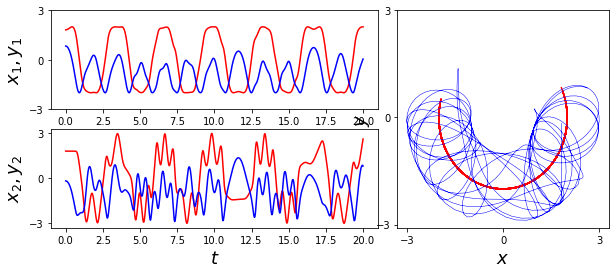

In [ ]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(tt, x1, 'r')
ax1.plot(tt, y1, 'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3, 0, 3])

ax2.plot(tt, x2, 'r')
ax2.plot(tt, y2, 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3, 0, 3])

ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])